### Data Augmentation To Address Overfitting In Flower Classification CNN 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='C:/Users/venky/Desktop/preview', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory

In [3]:
data_dir

'C:/Users/venky/Desktop/preview\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/venky/Desktop/preview/datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('C:/Users/venky/Desktop/preview/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/venky/Desktop/preview/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/venky/Desktop/preview/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/venky/Desktop/preview/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/venky/Desktop/preview/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/venky/Desktop/preview/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/venky/Desktop/preview/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Users/venky/Desktop/preview/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/venky/Desktop/preview/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/Users/venky/Desktop/preview/datasets/flowe

In [6]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [8]:
image_count

3670

In [9]:
roses = list(data_dir.glob('roses/*')) #It gives only rose flowers
roses[:5]

[WindowsPath('C:/Users/venky/Desktop/preview/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/venky/Desktop/preview/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/venky/Desktop/preview/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/venky/Desktop/preview/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/venky/Desktop/preview/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

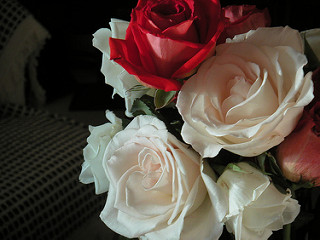

In [10]:
PIL.Image.open(str(roses[1]))

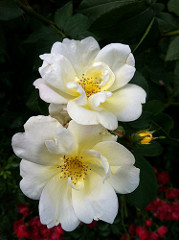

In [11]:
PIL.Image.open(str(roses[0]))

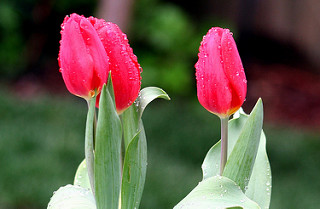

In [12]:
tulips = list(data_dir.glob('tulips/*')) #It gives only tulips flowers
PIL.Image.open(str(tulips[0]))

In [13]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
    
}

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
str(flowers_images_dict['roses'][0])

'C:\\Users\\venky\\Desktop\\preview\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [17]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [18]:
img.shape

(240, 179, 3)

In [19]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [20]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [21]:
X = np.array(X)
y = np.array(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
len(X_train)

2752

In [24]:
len(X_test)

918

In [25]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [26]:
X_train_scaled[0]

array([[[0.26666667, 0.30980392, 0.30196078],
        [0.24705882, 0.2745098 , 0.24705882],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.22352941, 0.24313725, 0.23529412],
        [0.23921569, 0.25098039, 0.23529412],
        [0.23529412, 0.23921569, 0.21568627],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.23921569, 0.22745098, 0.22352941],
        [0.25098039, 0.25098039, 0.23137255],
        [0.23137255, 0.23137255, 0.20784314],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16078431, 0.14901961]],

       ...,

       [[0.19215686, 0.4745098 , 0.36470588],
        [0.15686275, 0.25490196, 0.2       ],
        [0.20392157, 0

In [ ]:
num_classes = 5 #here 5 different flowers

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes) # Here we dn't define any activation, so by default it takes linear activation
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 51s 451ms/step - loss: 1.3526 - accuracy: 0.4408
Epoch 2/10
86/86 [==============================] - 38s 438ms/step - loss: 0.9957 - accuracy: 0.6083
Epoch 3/10
86/86 [==============================] - 39s 452ms/step - loss: 0.8192 - accuracy: 0.6777
Epoch 4/10
86/86 [==============================] - 38s 439ms/step - loss: 0.6559 - accuracy: 0.7558
Epoch 5/10
86/86 [==============================] - 38s 442ms/step - loss: 0.4013 - accuracy: 0.8590
Epoch 6/10
86/86 [==============================] - 40s 465ms/step - loss: 0.2536 - accuracy: 0.9113
Epoch 7/10
86/86 [==============================] - 45s 526ms/step - loss: 0.1296 - accuracy: 0.9637
Epoch 8/10
86/86 [==============================] - 44s 510ms/step - loss: 0.0626 - accuracy: 0.9847
Epoch 9/10
86/86 [==============================] - 45s 521ms/step - loss: 0.0605 - accuracy: 0.9851
Epoch 10/10
28/86 [========>.....................] - ETA: 30s - loss: 0.0458 - accuracy: 0.

In [ ]:
model.evaluate(X_test_scaled, y_test)

#### Here we see that while train accuracy is very high (98%), the test accuracy is significantly low (58.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

In [ ]:
score = tf.nn.softmax(predictions)

In [ ]:
score[0]

In [ ]:
np.argmax(score[0])

In [ ]:
np.argmax(score)

In [ ]:
y_test[0]

### Improve Test Accuracy using Data Augmentation

In [ ]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomContrast(0.5),
     layers.experimental.preprocessing.RandomRotation(0.1)
])

### Original Image

In [ ]:
plt.axis('off') #when we use plt.axis('off') It doesn't show x and y axis
plt.imshow(X[0])

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))